<a href="https://colab.research.google.com/github/Sakib3602/ML/blob/main/Logistic_Regresison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [26]:
data = load_breast_cancer()
X_full = data.data
y_full = data.target


print("Shape", X_full.shape)
print("Shape", y_full.shape)
print("Target", data.target_names)


Shape (569, 30)
Shape (569,)
Target ['malignant' 'benign']


In [27]:
f = data.feature_names
df = pd.DataFrame(X_full, columns=f)
df["target"] = y_full
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [28]:
df.describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.78000,28.11000
mean texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.80000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.10000,188.50000
mean area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.70000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.10530,0.16340
mean compactness,569.0,0.104341,0.052813,0.01938,0.06492,0.09263,0.13040,0.34540
mean concavity,569.0,0.088799,0.079720,0.00000,0.02956,0.06154,0.13070,0.42680
mean concave points,569.0,0.048919,0.038803,0.00000,0.02031,0.03350,0.07400,0.20120
mean symmetry,569.0,0.181162,0.027414,0.10600,0.16190,0.17920,0.19570,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.04996,0.05770,0.06154,0.06612,0.09744


In [29]:
df["target"].value_counts()

,count
target,
1,357
0,212


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42
)

SC = StandardScaler()
X_train_sc = SC.fit_transform(X_train)
X_test_sc = SC.transform(X_test)


In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train_sc, y_train)

y_test_pred = clf.predict(X_test_sc)
y_test_pred_prob = clf.predict_proba(X_test_sc)[:,1]
print("test accuracy " , accuracy_score(y_test, y_test_pred))

test accuracy  0.9736842105263158


In [44]:
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[41,  2],
       [ 1, 70]])

In [45]:
print("clasification report \n ",classification_report(y_test, y_test_pred))

clasification report 
                precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



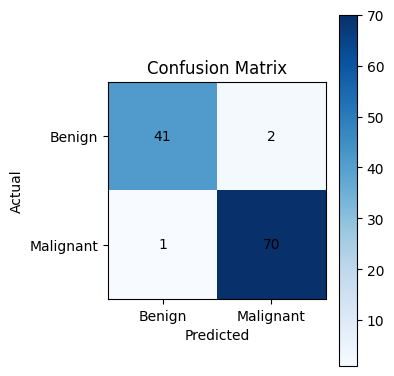

In [34]:
plt.figure(figsize=(4,4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
tick_labels = ["Benign", "Malignant"]
plt.xticks(ticks=[0,1], labels=tick_labels)
plt.yticks(ticks=[0,1], labels=tick_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(2):
  for j in range(2):
    plt.text(j, i, cm[i,j], ha="center", va="center",color='black')
plt.tight_layout()
plt.show()


In [35]:
# 1. Import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


acc = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
rec = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# 3. Print results
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

Accuracy:  0.9737
Precision: 0.9722
Recall:    0.9859
F1 Score:  0.9790


In [36]:

thresholds = np.linspace(0.1, 0.9, 9)
rows = []

for th in thresholds:

    y_pred_th = (y_test_pred_prob >= th).astype(int)


    acc = accuracy_score(y_test, y_pred_th)
    prec = precision_score(y_test, y_pred_th)
    rec = recall_score(y_test, y_pred_th)
    f1 = f1_score(y_test, y_pred_th)


    rows.append({
        'Threshold': th,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

df_metrics = pd.DataFrame(rows)
print(df_metrics)

   Threshold  Accuracy  Precision    Recall  F1 Score
0        0.1  0.956140   0.934211  1.000000  0.965986
1        0.2  0.973684   0.959459  1.000000  0.979310
2        0.3  0.982456   0.972603  1.000000  0.986111
3        0.4  0.982456   0.972603  1.000000  0.986111
4        0.5  0.973684   0.972222  0.985915  0.979021
5        0.6  0.982456   0.985915  0.985915  0.985915
6        0.7  0.956140   0.985294  0.943662  0.964029
7        0.8  0.956140   0.985294  0.943662  0.964029
8        0.9  0.929825   0.984615  0.901408  0.941176


# ***Regularization***

In [37]:
clf_r = LogisticRegression(max_iter=100, C=1000)
clf_r_h = LogisticRegression(max_iter=100, C=0.01)

clf_r.fit(X_train_sc, y_train)
clf_r_h.fit(X_train_sc, y_train)



LogisticRegression(C=0.01)

In [38]:
y_pred_r = clf_r.predict(X_test_sc)         # class labels
y_prob_r = clf_r.predict_proba(X_test_sc)   # probability scores

y_pred_r_h = clf_r_h.predict(X_test_sc)
y_prob_r_h = clf_r_h.predict_proba(X_test_sc)


# Accuracy
acc_r = accuracy_score(y_test, y_pred_r)
acc_r_h = accuracy_score(y_test, y_pred_r_h)

print("Accuracy (C=1000):", acc_r)
print("Accuracy (C=0.01):", acc_r_h)

# Classification report
print("\nClassification Report for C=1000:\n", classification_report(y_test, y_pred_r))
print("\nClassification Report for C=0.01:\n", classification_report(y_test, y_pred_r_h))

# Confusion matrix
print("\nConfusion Matrix (C=1000):\n", confusion_matrix(y_test, y_pred_r))
print("\nConfusion Matrix (C=0.01):\n", confusion_matrix(y_test, y_pred_r_h))

Accuracy (C=1000): 0.9385964912280702
Accuracy (C=0.01): 0.9649122807017544

Classification Report for C=1000:
               precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.98      0.92      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.94      0.94      0.94       114


Classification Report for C=0.01:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.95      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114


Confusion Matrix (C=1000):
 [[42  1]
 [ 6 65]]

Confusion Matrix (C=0.01):
 [[39  4]
 [ 0 71]]
